In [1]:
import os
import sys
import time
import numpy as np
sys.path.append(os.path.join(os.path.abspath(""), ".."))

from scipy import signal
from mpl_toolkits.axes_grid1 import make_axes_locatable
from app.transforms import FFT, IFFT, CreateOnesMask
from app.filters import CreateKernel, Convolve, Canny, HOG
from app.imager import ImageLoader, DefectViewer, Show, Exposure

In [41]:
# Load 4 images of class 'NearSolderPad'
n_samples = 4  # Number of samples of images
image_df = ImageLoader(defect_class='NearSolderPad') << n_samples 
images = DefectViewer() << image_df

In [49]:
n_samples = 4  # Number of samples of images
good_image_df = ImageLoader(defect_class='None') << n_samples 
good_images = DefectViewer() << good_image_df

### Plot Good Images

In [48]:
_ = Show(do_show=True) << good_images

AttributeError: 'tuple' object has no attribute 'shape'

### Plot NearSolderPad Images

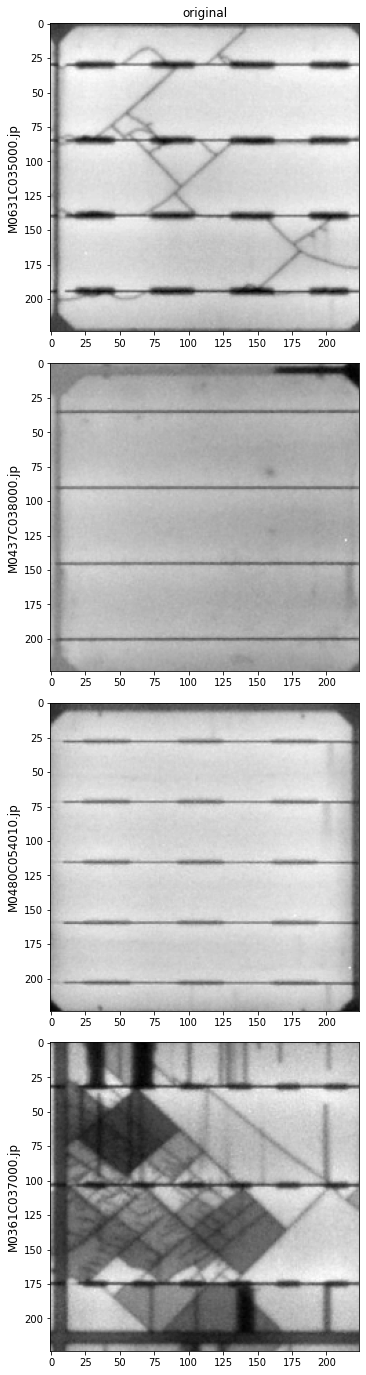

In [44]:
_ = Show(do_show=True) << images

### Simple Edge Detection:

In [6]:
kernel= np.array([[-1,  0,  1], 
                  [-4,  0,  4],
                  [-1,  0,  1]])
print("Simple Edge Detection on Good Images")
c_imgs = Convolve(axis=-2) << (CreateKernel(dim=2, kernel='custom', custom_kernel=kernel) << good_images)
_ = Show('custom', do_show=True) << c_imgs

Simple Edge Detection on Good Images


KeyError: 'custom_kernel'

Simple Edge Detection on NearSolderPad Images


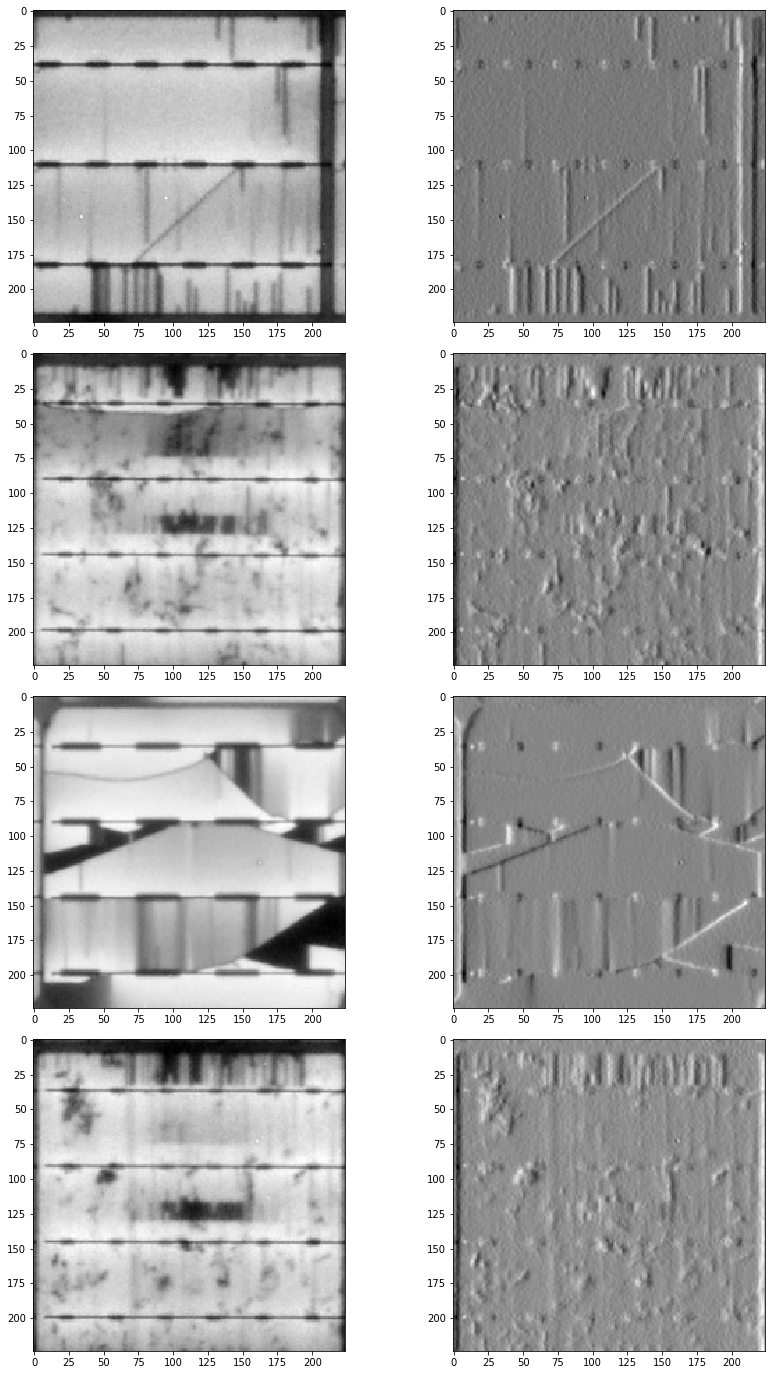

In [7]:
print("Simple Edge Detection on NearSolderPad Images")
c_imgs = Convolve(axis=-2) << (CreateKernel(dim=2, kernel='custom', custom_kernel=kernel) << images)
_ = Show('custom', do_show=True) << c_imgs

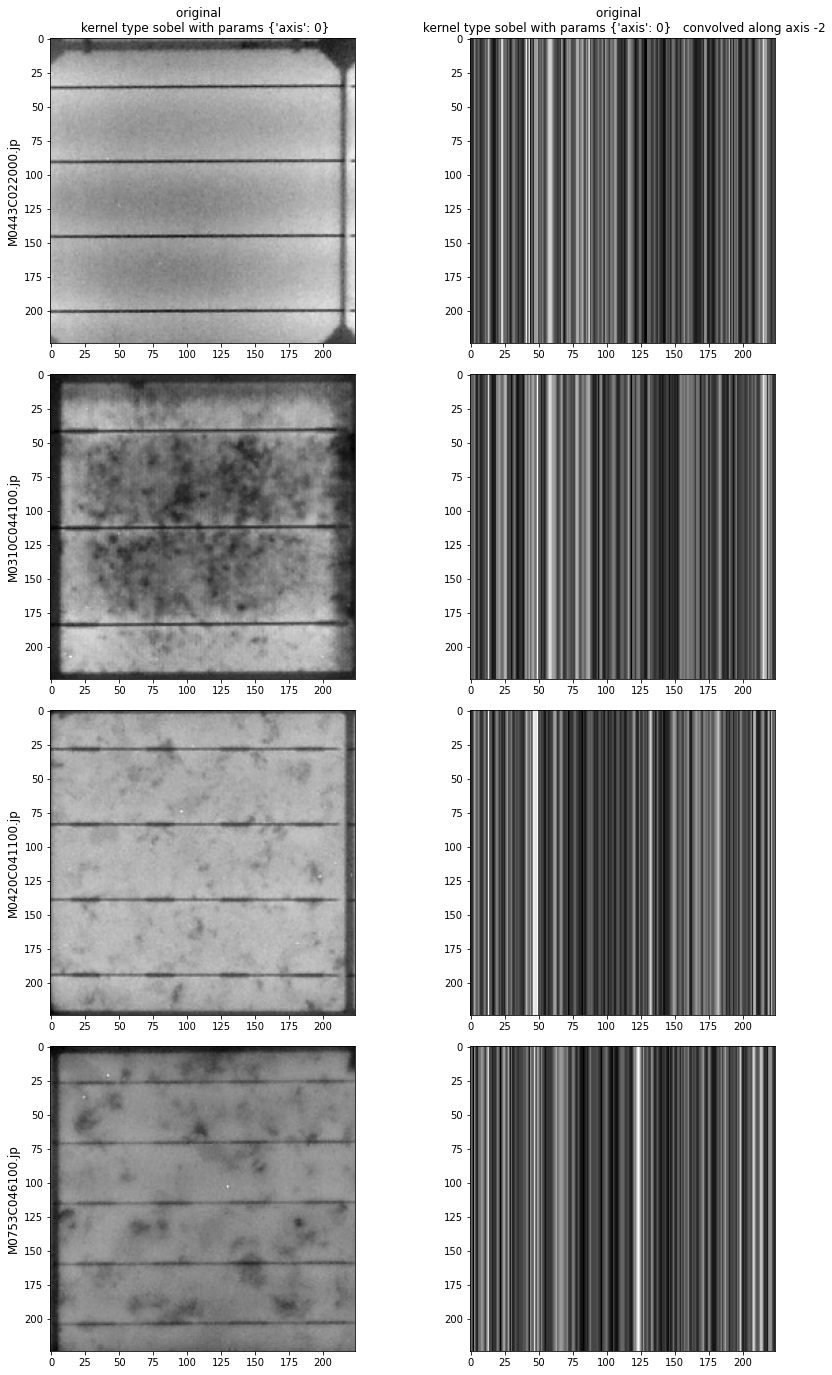

In [56]:
x_imgs_tup = Convolve(axis=-2) << (CreateKernel(dim=2, kernel='sobel', axis=0) << good_images)
y_imgs_tup = Convolve(axis=-2) << (CreateKernel(dim=2, kernel='sobel', axis=1) << good_images)

x_imgs = x_imgs_tup[-1].images
y_imgs = y_imgs_tup[-1].images
c_imgs = np.empty([x_imgs.shape[0], x_imgs.shape[1], x_imgs.shape[2]],dtype=x_imgs.dtype)

for img in range(len(x_imgs)):
    magnitude = np.sqrt(np.add(np.multiply(x_imgs[1][img], x_imgs[1][img]), np.multiply(y_imgs[1][img], y_imgs[1][img])))
    magnitude = magnitude / np.max(magnitude)
    c_imgs[img] = np.asarray(magnitude)  
    
#c_imgs = tuple(c_imgs)   
sobel_imgs = x_imgs_tup[-1]
sobel_imgs.images = c_imgs
_ = Show(num_images=4) << x_imgs_tup

In [ ]:
    ClassName(<init params>).apply(x_imgs)

In [57]:
x_imgs = Convolve(axis=-2) << (CreateKernel(dim=2, kernel='sobel', axis=0) << images)
y_imgs = Convolve(axis=-2) << (CreateKernel(dim=2, kernel='sobel', axis=1) << images)

c_imgs = np.empty([2, images.shape[0], images.shape[1], images.shape[2]],dtype=images.dtype)
c_imgs[0] = images
for img in range(len(images)):
    magnitude = np.sqrt(np.add(np.multiply(x_imgs[1][img], x_imgs[1][img]), np.multiply(y_imgs[1][img], y_imgs[1][img])))
    magnitude = magnitude / np.max(magnitude)
    c_imgs[1][img] = np.asarray(magnitude)  
    
sobel_imgs = tuple(c_imgs)
_ = Show('sobel', do_show=True) << sobel_imgs

AttributeError: 'ImageWrapper' object has no attribute 'shape'